In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
import warnings
warnings.filterwarnings('ignore')

In [185]:
df=pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [186]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [187]:
df.shape

(32581, 12)

In [188]:
df.drop_duplicates(inplace=True)

In [189]:
df.shape

(32416, 12)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [191]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [192]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

### finding null values

In [193]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [194]:
cols = ['person_emp_length','loan_int_rate']

In [195]:
for c in cols :
    df[c].fillna(df[c].median(),inplace =True)
    print(df[c].isna().sum() )                                #null values are replaced with median

0
0


In [196]:
df.isna().sum()   

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### outliers with visualisation

<Axes: >

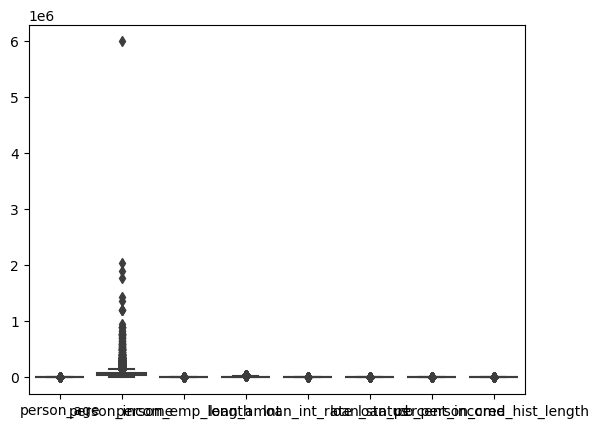

In [197]:
sns.boxplot(df)

In [198]:
columns = ['person_age', 'person_income',
       'person_emp_length', 'loan_amnt',
       'loan_int_rate','loan_percent_income',
        'cb_person_cred_hist_length']

### Auto Error Detection

In [199]:
for i in columns:
    skew =df[i].skew().round()
    if skew !=0:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.5)
        iqr = q3-q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        df[i] = df[i].map(lambda x: lower if x<lower else upper if x>upper else x)
    else:
        m = df[i].mean()
        s = df[i].std()
        low = m-3*s
        up = m+3*s
        df[i] = df[i].map(lambda x: low if x<low else up if x>up else x)
             

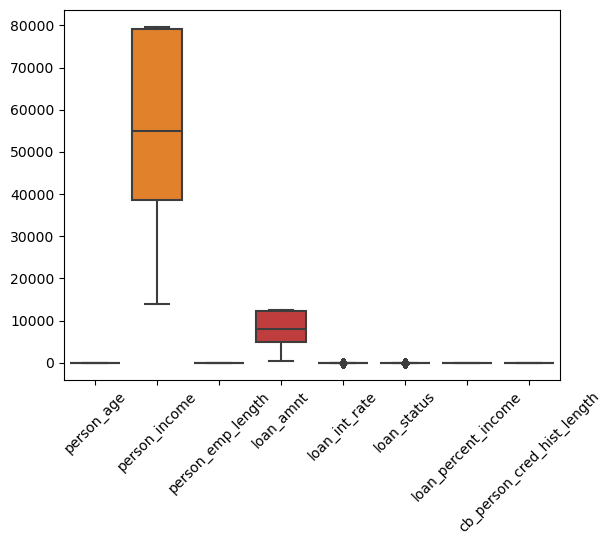

In [200]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

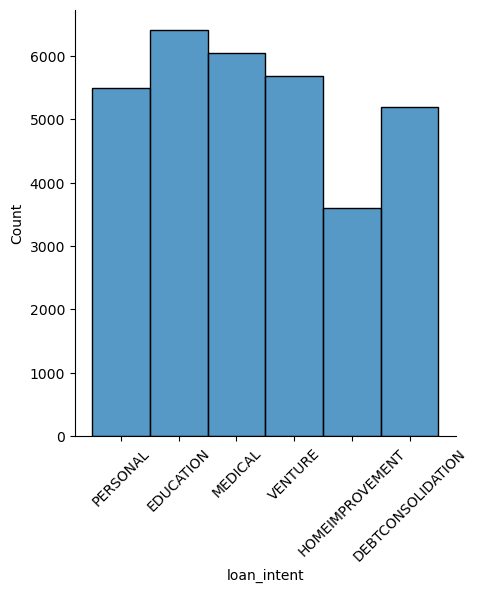

In [201]:
sns.displot(df[ 'loan_intent'])
plt.xticks(rotation=45)
plt.show()

In [202]:
#### loans for education sector is highest

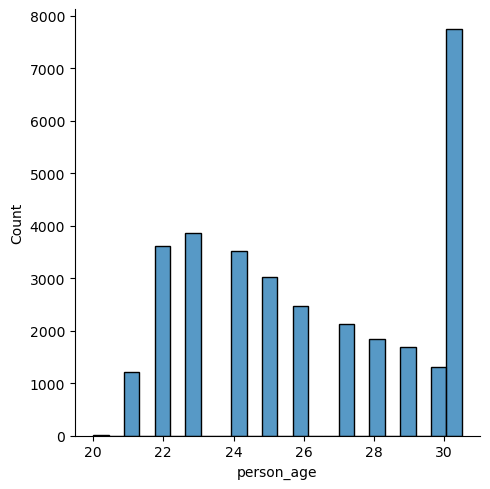

In [203]:
sns.displot(df['person_age'])

In [204]:
# age around 30 are the highest takers

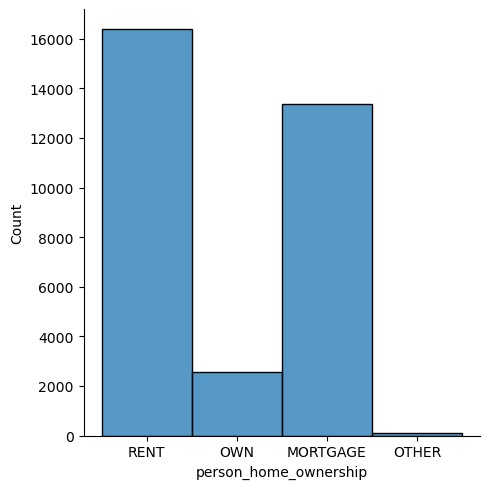

In [205]:
sns.displot(df['person_home_ownership'])

In [206]:
# persons with rented are the highest takers

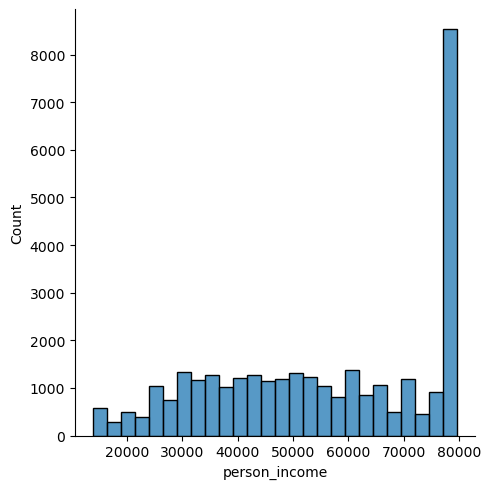

In [207]:
sns.displot(df['person_income'])

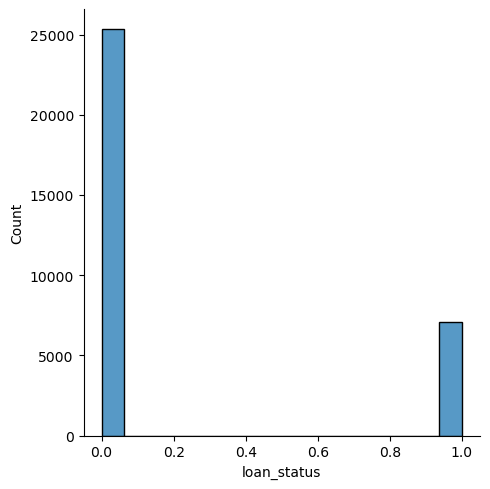

In [208]:
sns.displot(df['loan_status'])

In [209]:
# 0 - no default
# 1 - default

In [210]:
df.loan_status.groupby(df.loan_intent).mean()   # annova test with more than 2 calsses
                                              

loan_intent
DEBTCONSOLIDATION    0.286760
EDUCATION            0.172516
HOMEIMPROVEMENT      0.261547
MEDICAL              0.267627
PERSONAL             0.198981
VENTURE              0.148539
Name: loan_status, dtype: float64

### encoding

In [211]:
df[ 'loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [212]:
from sklearn.preprocessing import OneHotEncoder

In [213]:
ohe = OneHotEncoder()

In [214]:
ohe

OneHotEncoder()

In [215]:
ohe.fit(df[[ 'loan_intent']])

OneHotEncoder()

In [216]:
ary=ohe.transform(df[[ 'loan_intent']]).toarray()

In [217]:
ohe.categories_

[array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object)]

In [218]:
df[ 'loan_intent'] = ary

In [219]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,7.0,0.0,D,12500.0,16.02,1,0.24,Y,3.0
1,21.0,13855.0,OWN,5.0,0.0,B,1000.0,11.14,0,0.10,N,2.0
2,25.0,13855.0,MORTGAGE,1.0,0.0,C,5500.0,12.87,1,0.24,N,3.0
3,23.0,65500.0,RENT,4.0,0.0,C,12500.0,15.23,1,0.24,N,2.0
4,24.0,54400.0,RENT,7.0,0.0,C,12500.0,14.27,1,0.24,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,30.5,53000.0,MORTGAGE,1.0,0.0,C,5800.0,13.16,0,0.11,N,5.5
32577,30.5,79687.0,MORTGAGE,4.0,0.0,A,12500.0,7.49,0,0.15,N,5.5
32578,30.5,76000.0,RENT,3.0,0.0,B,12500.0,10.99,1,0.24,N,5.5
32579,30.5,79687.0,MORTGAGE,5.0,0.0,B,12500.0,11.48,0,0.10,N,5.5


In [220]:
ohe1 =OneHotEncoder()

In [221]:
ohe1

OneHotEncoder()

In [222]:
ohe1.fit(df[['person_home_ownership']])

OneHotEncoder()

In [223]:
ary1=ohe1.transform(df[['person_home_ownership']]).toarray()

In [224]:
df['person_home_ownership']  = ary1

In [225]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,0.0,7.0,0.0,D,12500.0,16.02,1,0.24,Y,3.0
1,21.0,13855.0,0.0,5.0,0.0,B,1000.0,11.14,0,0.10,N,2.0
2,25.0,13855.0,1.0,1.0,0.0,C,5500.0,12.87,1,0.24,N,3.0
3,23.0,65500.0,0.0,4.0,0.0,C,12500.0,15.23,1,0.24,N,2.0
4,24.0,54400.0,0.0,7.0,0.0,C,12500.0,14.27,1,0.24,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,30.5,53000.0,1.0,1.0,0.0,C,5800.0,13.16,0,0.11,N,5.5
32577,30.5,79687.0,1.0,4.0,0.0,A,12500.0,7.49,0,0.15,N,5.5
32578,30.5,76000.0,0.0,3.0,0.0,B,12500.0,10.99,1,0.24,N,5.5
32579,30.5,79687.0,1.0,5.0,0.0,B,12500.0,11.48,0,0.10,N,5.5


In [226]:
from sklearn.preprocessing import OrdinalEncoder

In [227]:
ord = OrdinalEncoder()

In [228]:
ord

OrdinalEncoder()

In [229]:
ord.fit(df[[ 'loan_grade']])

OrdinalEncoder()

In [230]:
ary2=ord.transform( df[[ 'loan_grade']])

In [231]:
df[ 'loan_grade'] =ary2

In [232]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,0.0,7.0,0.0,3.0,12500.0,16.02,1,0.24,Y,3.0
1,21.0,13855.0,0.0,5.0,0.0,1.0,1000.0,11.14,0,0.10,N,2.0
2,25.0,13855.0,1.0,1.0,0.0,2.0,5500.0,12.87,1,0.24,N,3.0
3,23.0,65500.0,0.0,4.0,0.0,2.0,12500.0,15.23,1,0.24,N,2.0
4,24.0,54400.0,0.0,7.0,0.0,2.0,12500.0,14.27,1,0.24,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,30.5,53000.0,1.0,1.0,0.0,2.0,5800.0,13.16,0,0.11,N,5.5
32577,30.5,79687.0,1.0,4.0,0.0,0.0,12500.0,7.49,0,0.15,N,5.5
32578,30.5,76000.0,0.0,3.0,0.0,1.0,12500.0,10.99,1,0.24,N,5.5
32579,30.5,79687.0,1.0,5.0,0.0,1.0,12500.0,11.48,0,0.10,N,5.5


In [233]:
ord1 = OrdinalEncoder()

In [234]:
ord1

OrdinalEncoder()

In [235]:
ord1.fit(df[['cb_person_default_on_file']])

OrdinalEncoder()

In [236]:
ary3=ord1.transform(df[['cb_person_default_on_file']])

In [237]:
df['cb_person_default_on_file'] = ary3

In [238]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,0.0,7.0,0.0,3.0,12500.0,16.02,1,0.24,1.0,3.0
1,21.0,13855.0,0.0,5.0,0.0,1.0,1000.0,11.14,0,0.10,0.0,2.0
2,25.0,13855.0,1.0,1.0,0.0,2.0,5500.0,12.87,1,0.24,0.0,3.0
3,23.0,65500.0,0.0,4.0,0.0,2.0,12500.0,15.23,1,0.24,0.0,2.0
4,24.0,54400.0,0.0,7.0,0.0,2.0,12500.0,14.27,1,0.24,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,30.5,53000.0,1.0,1.0,0.0,2.0,5800.0,13.16,0,0.11,0.0,5.5
32577,30.5,79687.0,1.0,4.0,0.0,0.0,12500.0,7.49,0,0.15,0.0,5.5
32578,30.5,76000.0,0.0,3.0,0.0,1.0,12500.0,10.99,1,0.24,0.0,5.5
32579,30.5,79687.0,1.0,5.0,0.0,1.0,12500.0,11.48,0,0.10,0.0,5.5


### checking imbalance

In [239]:
df[ 'loan_status'].value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

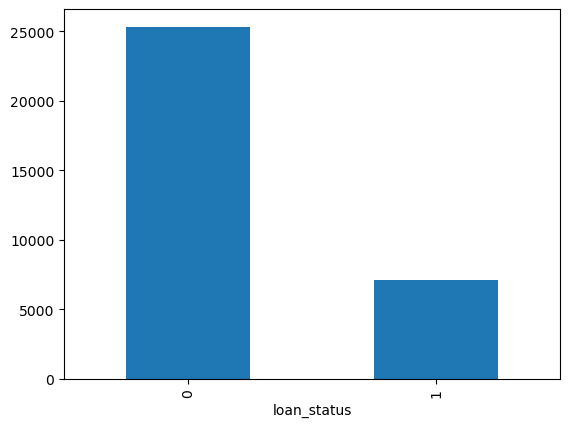

In [240]:
df[ 'loan_status'].value_counts().plot(kind='bar')

In [241]:
X =  df.drop('loan_status',axis=1)

In [242]:
y =df ['loan_status']

### Data splitting 

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20)

In [245]:
X_train.shape,y_train.shape

((32396, 11), (32396,))

In [246]:
from sklearn.linear_model import LogisticRegression   

In [247]:
lrmodel = LogisticRegression()    # works well with binary classification

In [248]:
lrmodel

LogisticRegression()

In [249]:
lrmodel.fit(X_train,y_train)

LogisticRegression()

In [250]:
lrmodel.score(X_test,y_test)

0.95

In [251]:
y_pred=lrmodel.predict(X_test)

In [252]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [253]:
from sklearn.metrics import classification_report,RocCurveDisplay

In [254]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.50      1.00      0.67         1

    accuracy                           0.95        20
   macro avg       0.75      0.97      0.82        20
weighted avg       0.97      0.95      0.96        20



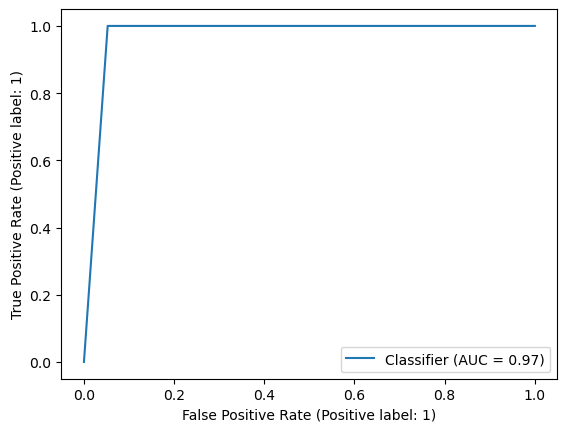

In [255]:
RocCurveDisplay.from_predictions(y_test,y_pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtcmodel = DecisionTreeClassifier()

In [ ]:
dtcmodel

In [ ]:
dtcmodel.fit(X_train,y_train)

In [ ]:
dtcmodel.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfcmodel = RandomForestClassifier()

In [ ]:
rfcmodel

In [ ]:
rfcmodel.fit(X_train,y_train)

In [ ]:
rfcmodel.score(X_test,y_test)